In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('./BitcoinHeistData.csv')
df.head(10)

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,8.333333e-03,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,2.441406e-04,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000e+00,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,3.906250e-03,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,7.284841e-02,456,0,1,200000000.0,princetonLocky
5,112AmFATxzhuSpvtz1hfpa3Zrw3BG276pc,2016,96,144,8.461400e-02,2821,0,1,50000000.0,princetonLocky
6,112E91jxS2qrQY1z78LPWUWrLVFGqbYPQ1,2016,225,142,2.088519e-03,881,0,2,100000000.0,princetonCerber
7,112eFykaD53KEkKeYW9KW8eWebZYSbt2f5,2016,324,78,3.906250e-03,1,0,2,100990000.0,princetonCerber
8,112FTiRdJjMrNgEtd4fvdoq3TC33Ah5Dep,2016,298,144,2.302828e+00,4220,0,2,80000000.0,princetonCerber
9,112GocBgFSnaote6krx828qaockFraD8mp,2016,62,112,3.725290e-09,1,0,1,50000000.0,princetonLocky


In [3]:
df.describe()

,year,day,length,weight,count,looped,neighbors,income
count,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06
mean,2.014475e+03,1.814572e+02,4.500859e+01,5.455192e-01,7.216446e+02,2.385067e+02,2.206516e+00,4.464889e+09
std,2.257398e+00,1.040118e+02,5.898236e+01,3.674255e+00,1.689676e+03,9.663217e+02,1.791877e+01,1.626860e+11
min,2.011000e+03,1.000000e+00,0.000000e+00,3.606469e-94,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+07
25%,2.013000e+03,9.200000e+01,2.000000e+00,2.148438e-02,1.000000e+00,0.000000e+00,1.000000e+00,7.428559e+07
50%,2.014000e+03,1.810000e+02,8.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,2.000000e+00,1.999985e+08
75%,2.016000e+03,2.710000e+02,1.080000e+02,8.819482e-01,5.600000e+01,0.000000e+00,2.000000e+00,9.940000e+08
max,2.018000e+03,3.650000e+02,1.440000e+02,1.943749e+03,1.449700e+04,1.449600e+04,1.292000e+04,4.996440e+13


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916697 entries, 0 to 2916696
Data columns (total 10 columns):
 #   Column     Dtype  
---  ------     -----  
 0   address    object 
 1   year       int64  
 2   day        int64  
 3   length     int64  
 4   weight     float64
 5   count      int64  
 6   looped     int64  
 7   neighbors  int64  
 8   income     float64
 9   label      object 
dtypes: float64(2), int64(6), object(2)
memory usage: 222.5+ MB


In [5]:
#checking if there are any missing values present in the dataset
df.isnull().values.any()

False

In [6]:
#checking for databalance 
df['label'].value_counts(normalize=True)*100

white                          98.580140
paduaCryptoWall                 0.424796
montrealCryptoLocker            0.319368
princetonCerber                 0.316214
princetonLocky                  0.227140
montrealCryptXXX                0.082936
montrealNoobCrypt               0.016560
montrealDMALockerv3             0.012137
montrealDMALocker               0.008606
montrealSamSam                  0.002126
montrealGlobeImposter           0.001886
montrealCryptoTorLocker2015     0.001886
montrealGlobev3                 0.001166
montrealGlobe                   0.001097
montrealWannaCry                0.000960
montrealRazy                    0.000446
montrealAPT                     0.000377
paduaKeRanger                   0.000343
montrealFlyper                  0.000309
montrealXTPLocker               0.000274
montrealVenusLocker             0.000240
montrealCryptConsole            0.000240
montrealXLockerv5.0             0.000240
montrealEDA2                    0.000206
montrealJigSaw  

<AxesSubplot:>

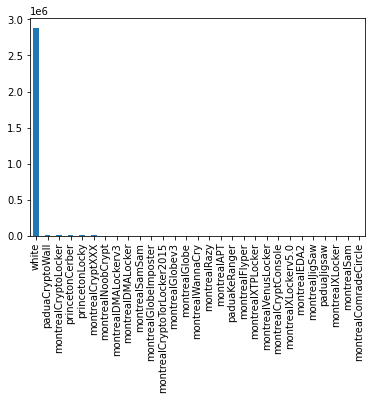

In [7]:
df['label'].value_counts().plot(kind="bar")

In [8]:
correlation_test = df.corr()
correlation_test

,year,day,length,weight,count,looped,neighbors,income
year,1.000000,-0.040307,0.163101,0.011827,0.285415,0.113164,-0.000876,-0.020535
day,-0.040307,1.000000,0.011919,0.000864,-0.002538,0.002566,0.000181,0.002628
length,0.163101,0.011919,1.000000,0.000228,0.703467,0.411609,0.031523,0.000488
weight,0.011827,0.000864,0.000228,1.000000,0.022313,0.061646,0.691963,0.069774
count,0.285415,-0.002538,0.703467,0.022313,1.000000,0.560370,0.025441,-0.003635
looped,0.113164,0.002566,0.411609,0.061646,0.560370,1.000000,0.052826,0.002551
neighbors,-0.000876,0.000181,0.031523,0.691963,0.025441,0.052826,1.000000,0.138966
income,-0.020535,0.002628,0.000488,0.069774,-0.003635,0.002551,0.138966,1.000000


<AxesSubplot:>

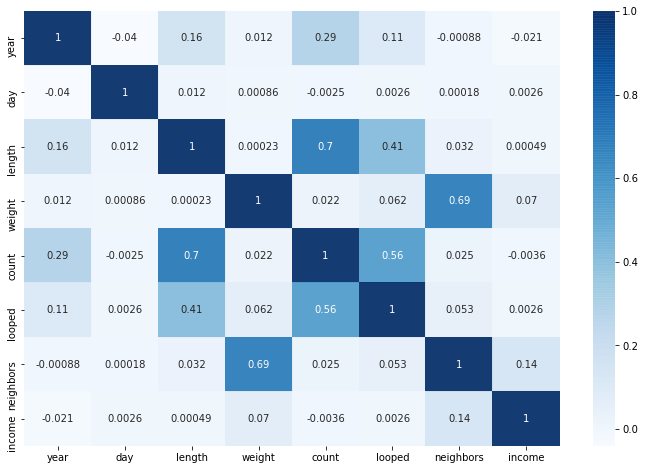

In [9]:
plt.figure(figsize = (12,8))
sns.heatmap(correlation_test,alpha=0.95,cmap='Blues',annot=True)

It looks like none of the columns are correlated to one other. This is correct because the dataset is highly imbalanced and requires further analysis and preprocessing.

<AxesSubplot:>

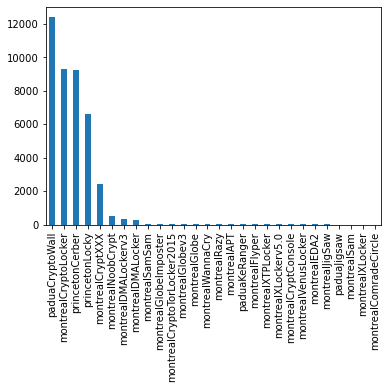

In [10]:
df_black = df[df['label']!='white']
df_black['label'].value_counts().plot(kind='bar')

Of the addresses that are marked as ransomware, majority of the ransomware addresses belong to crypto families like CryptoWall, CryptoLocker, Cerber, Locky, CryptXXX, NoobCrypt.

In [12]:
kmeans = KMeans(3)
kmeans.fit(df[])

ValueError: could not convert string to float: '111K8kZAEnJg245r2cM6y9zgJGHZtJPy6'